# Notebook Power Prices Futures Prediction

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
import requests
from requests_kerberos import HTTPKerberosAuth
import os 
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')

import warnings
warnings.filterwarnings('ignore')
from mod import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
times_series = ['mu.ELEC_FR.DLI.']
countries_series = ['France DA (EUR/MWh)']

dates_series = pd.date_range(dt.date(2021,12,1),dt.date.today()-dt.timedelta(days=1),freq='d')
prices = pd.DataFrame(index = dates_series.strftime(medeco_dt_format)) 
prices.index.name = 'Date'

for name in times_series :
    prices_series = medeco_get_values(name, dt.date(2021,12,1), dt.date.today(), radicalDef = "B" , server = 'prod', format = 'df' )
    prices_series = prices_series.astype(float)
    prices_series.columns = [name]
    prices_series.loc[prices_series[name] == 'NaN'] = np.NaN 
    prices = pd.concat([prices,prices_series], axis = 1)

prices.columns = countries_series
prices.index.name = 'Date'
prices.dropna(axis = 0, inplace = True)
prices.to_csv("French Power Prices Medeco.txt", sep = ',')
prices

,France DA (EUR/MWh)
Date,
2021-12-01,277.77
2021-12-02,299.22
2021-12-03,222.17
2021-12-06,258.65
2021-12-07,247.43
...,...
2022-08-02,508.48
2022-08-03,482.37
2022-08-04,482.37


Rafraichir le script a partir de cette ligne si les prix sont a jour.

In [45]:
prices = pd.read_csv("French Power Prices Medeco.txt")
prices["Date"] = pd.to_datetime(prices["Date"])
prices.head()

,Date,France DA (EUR/MWh)
0,2021-12-01,277.77
1,2021-12-02,299.22
2,2021-12-03,222.17
3,2021-12-06,258.65
4,2021-12-07,247.43


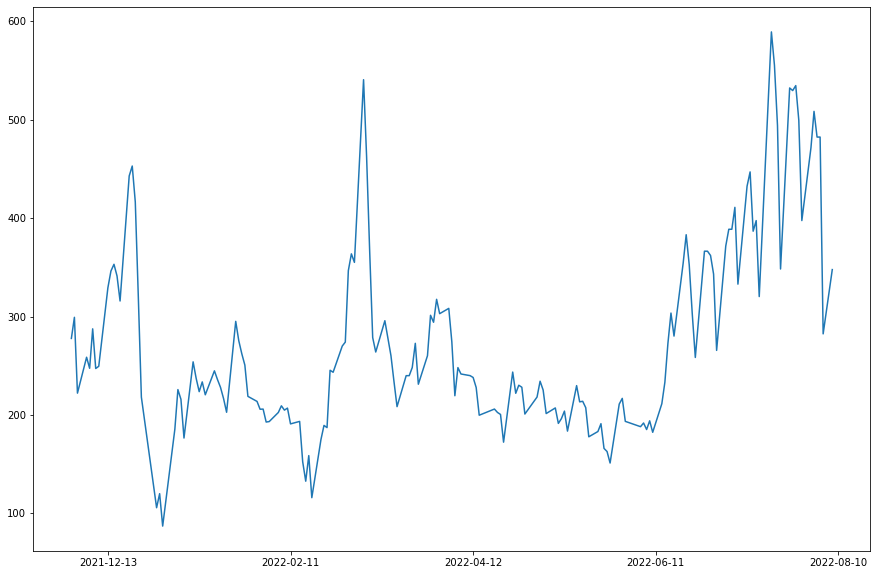

In [46]:
plt.figure(figsize = (15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
plt.plot( prices['Date'], prices['France DA (EUR/MWh)']);

Data preprocessing